In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from linearmodels.panel import PooledOLS
from linearmodels.panel import PanelOLS, RandomEffects, compare
from scipy.stats import skew, kurtosis
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
data = pd.read_csv('../data/processed/final_data.csv')

In [4]:
# Identify all the variables in the dataset and their data types
print("Variables and their data types:")
print(data.dtypes)

# Confirm the number of players and seasons
num_players = data['Player'].nunique()
num_seasons = data['Season'].nunique()
print(f"Number of players: {num_players}")
print(f"Number of seasons: {num_seasons}")

# Ensure the data is in a panel (long) format
print("First few rows of the dataset to confirm panel data structure:")
data.head()

Variables and their data types:
Player                        object
Team                          object
Age                            int64
Nationality                   object
Season                        object
MV1                          float64
MV2                          float64
Position                      object
Comp                          object
MP                             int64
Starts                         int64
Min                          float64
90s                          float64
Overall_Performance_Index    float64
Team_Rating                  float64
Latest_Transfer_Fee          float64
dtype: object
Number of players: 1126
Number of seasons: 4
First few rows of the dataset to confirm panel data structure:


,Player,Team,Age,Nationality,Season,MV1,MV2,Position,Comp,MP,Starts,Min,90s,Overall_Performance_Index,Team_Rating,Latest_Transfer_Fee
0,Aaron Cresswell,West Ham,27,England,2017/2018,12.0,12.0,Wing-Back,eng Premier League,36,35,3069.0,34.1,-0.180051,-0.500,4.28
1,Aaron Cresswell,West Ham,28,England,2018/2019,10.0,10.0,Wing-Back,eng Premier League,20,18,1589.0,17.7,-0.082492,-0.075,4.28
2,Aaron Cresswell,West Ham,29,England,2019/2020,8.0,6.5,Wing-Back,eng Premier League,31,31,2727.0,30.3,-0.070486,-0.325,4.28
3,Aaron Cresswell,West Ham,30,England,2020/2021,6.5,5.0,Wing-Back,eng Premier League,36,36,3170.0,35.2,-0.124919,0.375,4.28
4,Aaron Wan-Bissaka,Crystal Palace,19,England,2017/2018,1.0,1.0,Wing-Back,eng Premier League,7,7,627.0,7.0,-0.058601,-0.250,0.00


In [5]:
# Check for Missing Values

# Determine if there are any missing or null values in the dataset
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Player                       0
Team                         0
Age                          0
Nationality                  0
Season                       0
MV1                          0
MV2                          0
Position                     0
Comp                         0
MP                           0
Starts                       0
Min                          0
90s                          0
Overall_Performance_Index    0
Team_Rating                  0
Latest_Transfer_Fee          0
dtype: int64


In [6]:
# Summary Statistics

# Compute summary statistics for key variables
key_variables = ['MV1', 'MV2', 'Overall_Performance_Index']

# Check if 'Delta_MV' exists, if not create it as percentage
data['Delta_MV'] = ((data['MV2'] - data['MV1']) / data['MV1']) * 100
key_variables.append('Delta_MV')

# Calculate mean, median, and standard deviation for key variables
summary_stats = data[key_variables].agg(['mean', 'median', 'std'])
print("Summary Statistics for key variables:")
print(summary_stats)

Summary Statistics for key variables:
              MV1        MV2  Overall_Performance_Index    Delta_MV
mean    15.697624  16.247042               2.563570e-18   44.183040
median   9.000000   9.000000              -1.243784e-02   -7.142857
std     19.987840  20.308417               4.571711e-01  329.777100


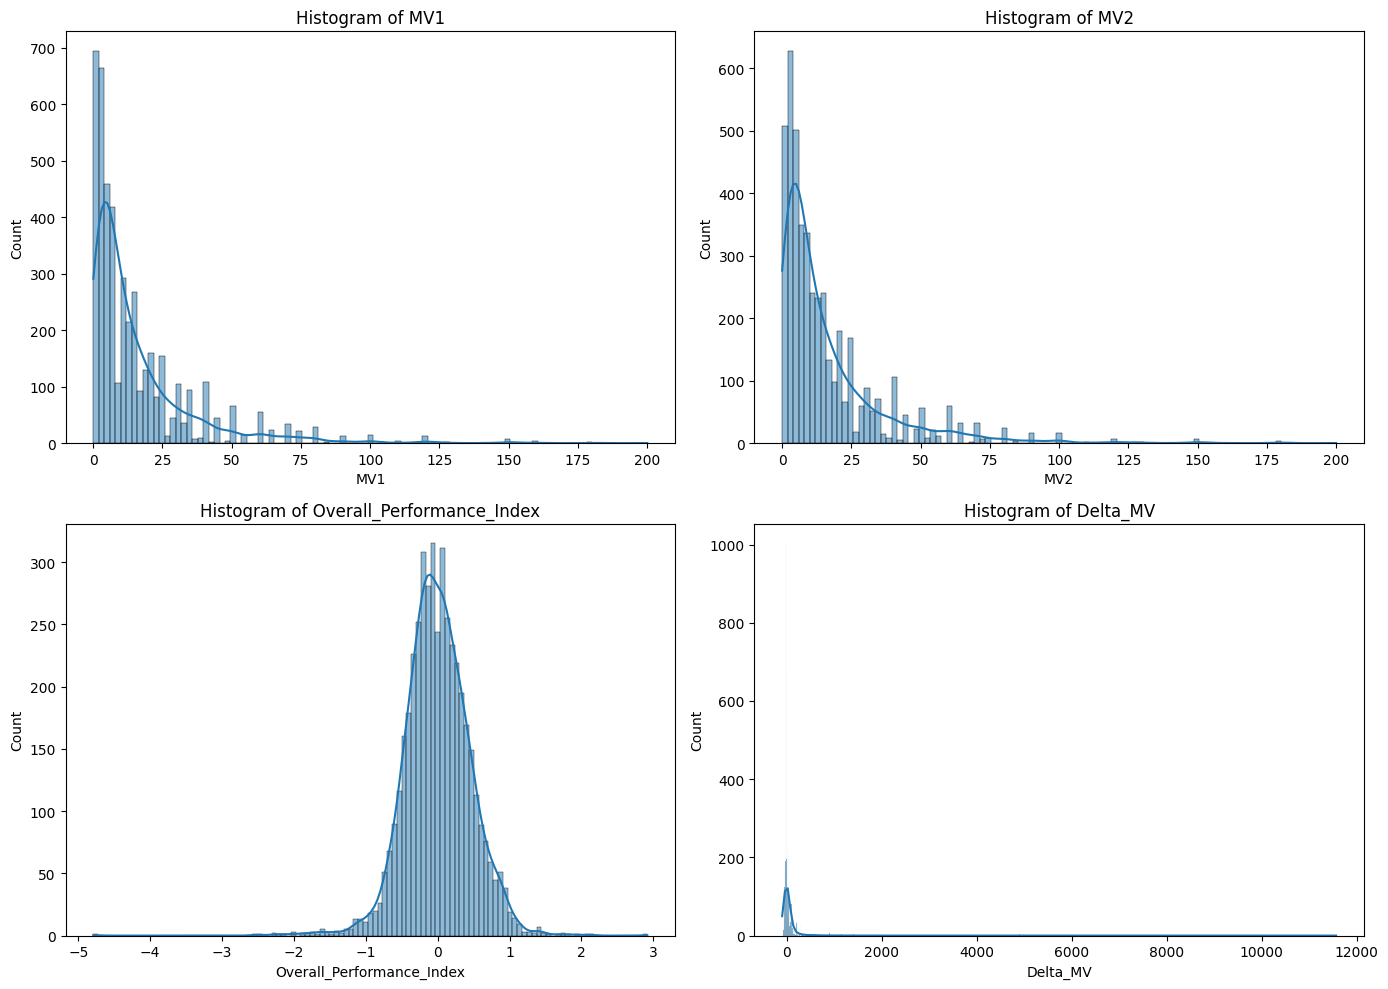

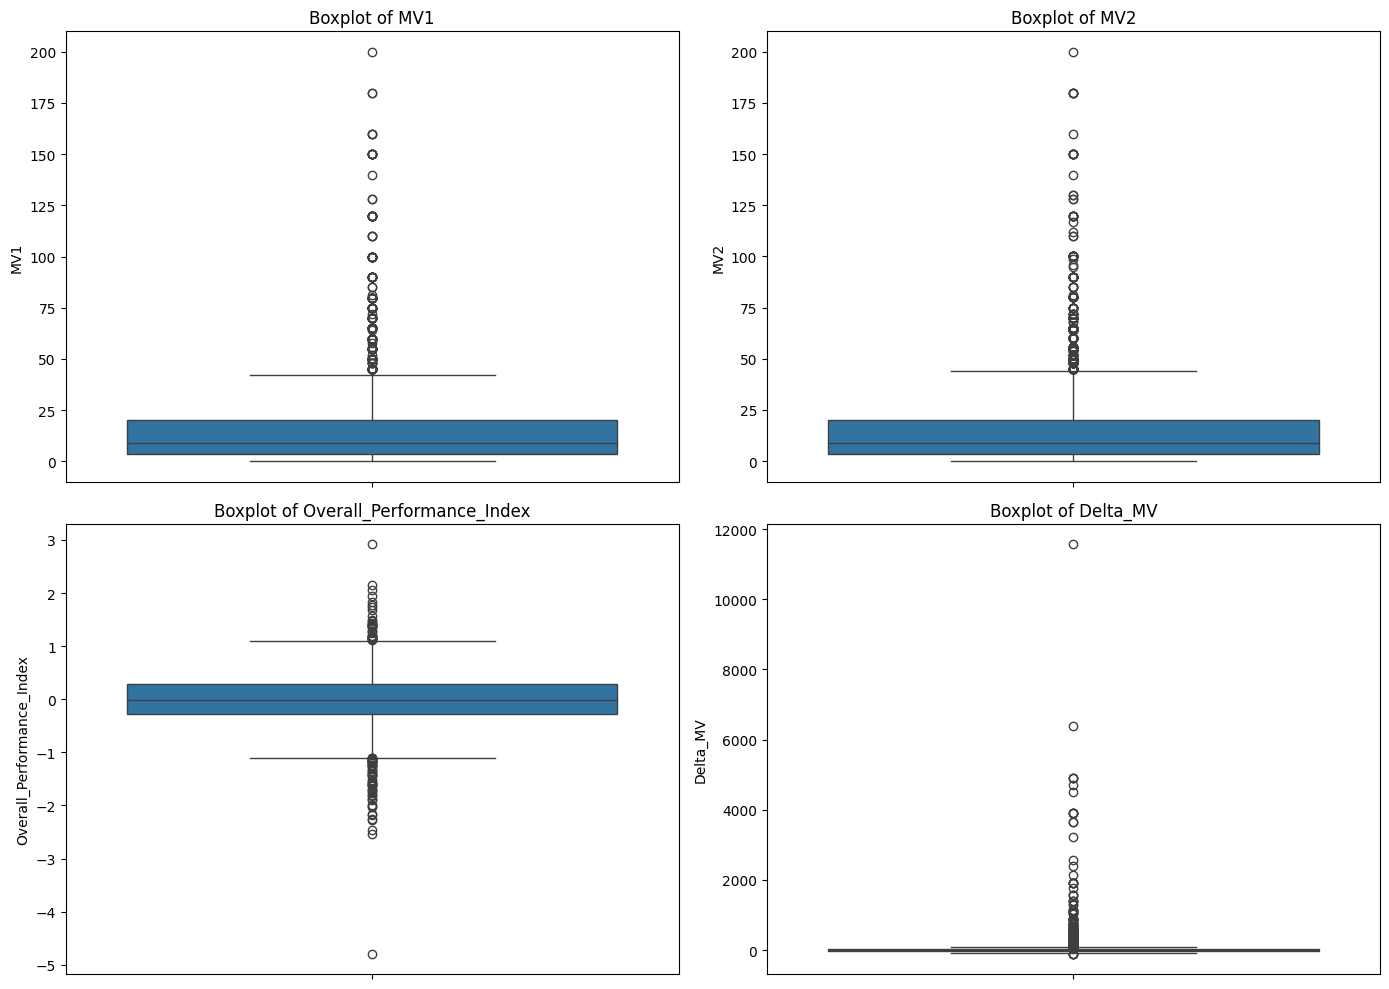

In [7]:
# Initial Visualizations (Optional):

# Create histograms for continuous variables to assess their distributions
continuous_vars = ['MV1', 'MV2', 'Overall_Performance_Index', 'Delta_MV']

plt.figure(figsize=(14, 10))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[var].dropna(), kde=True)
    plt.title(f'Histogram of {var}')
plt.tight_layout()
plt.show()

# Create boxplots for continuous variables to assess their distributions
plt.figure(figsize=(14, 10))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=data[var].dropna())
    plt.title(f'Boxplot of {var}')
plt.tight_layout()
plt.show()

In [8]:
# Compute skewness and kurtosis for key variables
print("Skewness and Kurtosis for key variables:")
for var in continuous_vars:
    print(f'{var} - Skewness: {skew(data[var].dropna())}, Kurtosis: {kurtosis(data[var].dropna())}')

# Compute correlation matrix for key variables
print("\nCorrelation Matrix for key variables:")
correlation_matrix = data[continuous_vars].corr()
correlation_matrix

Skewness and Kurtosis for key variables:
MV1 - Skewness: 3.017650050263296, Kurtosis: 13.181622146510875
MV2 - Skewness: 2.9057603800064378, Kurtosis: 12.464939067646688
Overall_Performance_Index - Skewness: -0.35212007636043835, Kurtosis: 4.704782889834166
Delta_MV - Skewness: 17.332641994024407, Kurtosis: 435.13082992908295

Correlation Matrix for key variables:


,MV1,MV2,Overall_Performance_Index,Delta_MV
MV1,1.000000,0.902620,0.367273,-0.096908
MV2,0.902620,1.000000,0.409953,0.010287
Overall_Performance_Index,0.367273,0.409953,1.000000,0.023477
Delta_MV,-0.096908,0.010287,0.023477,1.000000


Delta_MV - Min: -100.0, Max: 11566.666666666668, Mean: 44.18304030140175, Median: -7.142857142857142, Std: 329.7771002154872


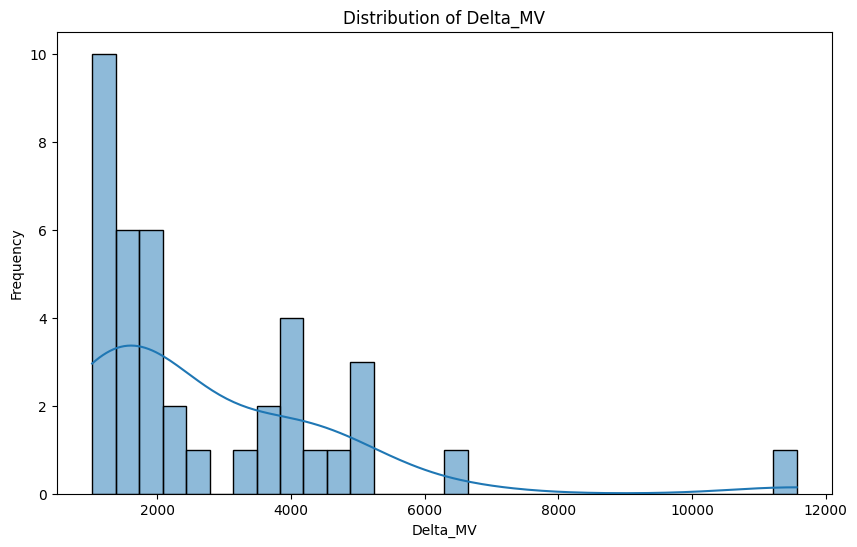

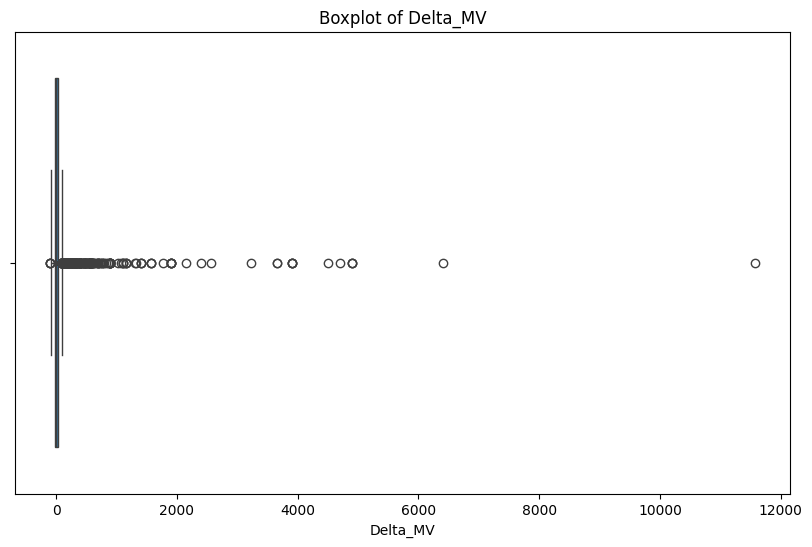

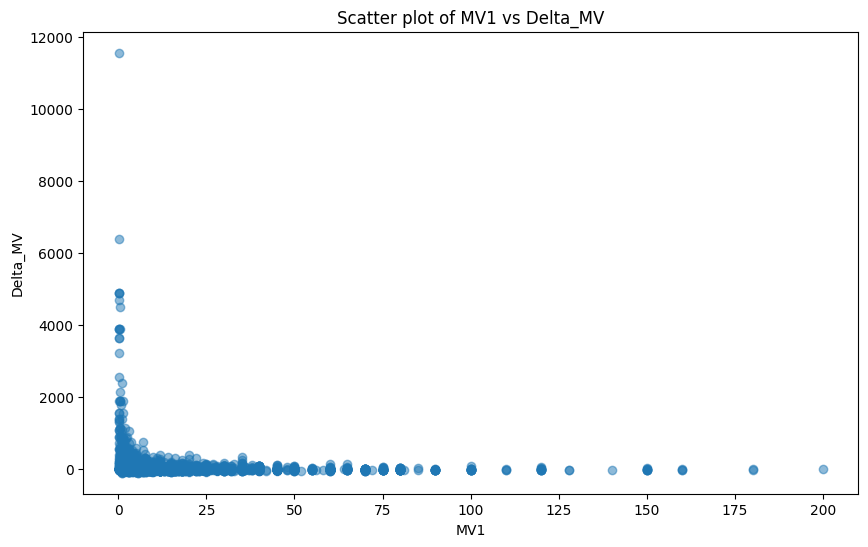

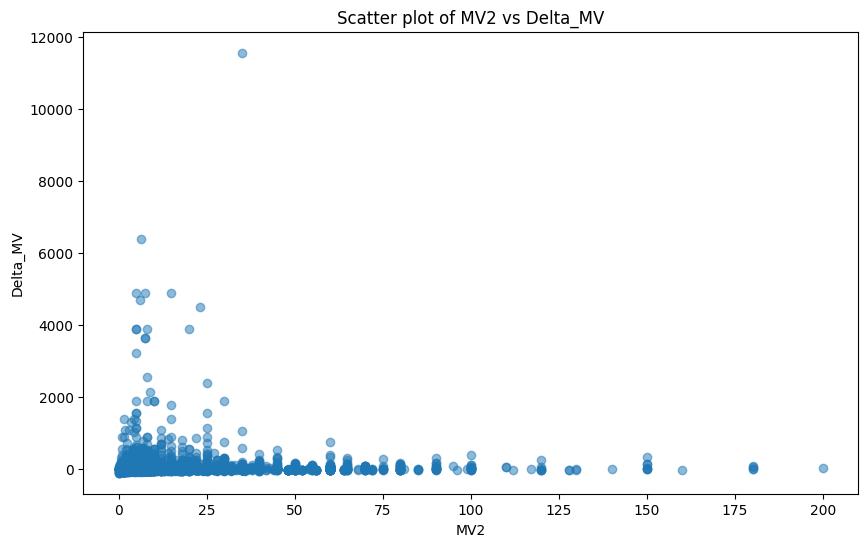

Delta_MV - Skewness: 17.332641994024407, Kurtosis: 435.13082992908295


In [9]:
# Analysis of Delta_MV variable

# Calculate basic statistics
delta_mv_min = data['Delta_MV'].min()
delta_mv_max = data['Delta_MV'].max()
delta_mv_mean = data['Delta_MV'].mean()
delta_mv_median = data['Delta_MV'].median()
delta_mv_std = data['Delta_MV'].std()

print(f"Delta_MV - Min: {delta_mv_min}, Max: {delta_mv_max}, Mean: {delta_mv_mean}, Median: {delta_mv_median}, Std: {delta_mv_std}")

# Plot distribution of Delta_MV
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Delta_MV'] >1000]['Delta_MV'].dropna(), kde=True, bins=30)
plt.title('Distribution of Delta_MV')
plt.xlabel('Delta_MV')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Delta_MV
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Delta_MV'].dropna())
plt.title('Boxplot of Delta_MV')
plt.xlabel('Delta_MV')
plt.show()

# Scatter plot of Delta_MV vs MV1
plt.figure(figsize=(10, 6))
plt.scatter(data['MV1'], data['Delta_MV'], alpha=0.5)
plt.title('Scatter plot of MV1 vs Delta_MV')
plt.xlabel('MV1')
plt.ylabel('Delta_MV')
plt.show()

# Scatter plot of Delta_MV vs MV2
plt.figure(figsize=(10, 6))
plt.scatter(data['MV2'], data['Delta_MV'], alpha=0.5)
plt.title('Scatter plot of MV2 vs Delta_MV')
plt.xlabel('MV2')
plt.ylabel('Delta_MV')
plt.show()

# Compute skewness and kurtosis for Delta_MV
delta_mv_skewness = skew(data['Delta_MV'].dropna())
delta_mv_kurtosis = kurtosis(data['Delta_MV'].dropna())

print(f"Delta_MV - Skewness: {delta_mv_skewness}, Kurtosis: {delta_mv_kurtosis}")

In [10]:
# Display the total number of observations
print("Original dataset size:", data.shape)

# Identify players with any MV2 <= 0
players_with_zero_mv2 = data[data['MV2'] <= 0]['Player'].unique()
print("Players with MV2 <= 0:", players_with_zero_mv2)

# Remove all observations for these players
data_cleaned = data[~data['Player'].isin(players_with_zero_mv2)].copy()
print("New dataset size after removing all seasons for affected players:", data_cleaned.shape)

# Verify the panel is balanced
player_counts = data_cleaned['Player'].value_counts()
print("Unique players after removal:", player_counts.shape[0])
print("All players have", data_cleaned['Season'].nunique(), "seasons:", (player_counts == 4).all())


Original dataset size: (4504, 17)
Players with MV2 <= 0: ['Borja Valero' 'David Abraham' 'Lars Bender' 'Sven Bender']
New dataset size after removing all seasons for affected players: (4488, 17)
Unique players after removal: 1122
All players have 4 seasons: True


In [11]:
# Create log-transformed variables
data_cleaned['Log_MV1'] = np.log(data_cleaned['MV1'])
data_cleaned['Log_MV2'] = np.log(data_cleaned['MV2'])

In [12]:
# Create Log Return of MV as the dependent variable
data_cleaned['Log_Return_MV'] = data_cleaned['Log_MV2'] - data_cleaned['Log_MV1']

In [13]:
# Initialize the scaler
scaler = StandardScaler()

# List of variables to standardize
variables_to_standardize = ['Min', 'Log_MV1', 'Team_Rating', 'Latest_Transfer_Fee', 'MP']

# Keep original Age
data_cleaned['Age_Original'] = data_cleaned['Age']

# Fit and transform the variables
data_cleaned[variables_to_standardize] = scaler.fit_transform(data_cleaned[variables_to_standardize])

# Standardize Age separately
data_cleaned['Age'] = scaler.fit_transform(data_cleaned[['Age']])

# Standardize Overall_Performance_Index based on position with mean 0 and variance 1
data_cleaned['Overall_Performance_Index'] = data_cleaned.groupby('Position')['Overall_Performance_Index'].transform(lambda x: (x - x.mean()) / x.std())

In [14]:
# Create the interaction term
data_cleaned['Perf_MV1_Interaction'] = data_cleaned['Overall_Performance_Index'] * data_cleaned['Log_MV1']

In [15]:
# Convert 'Season' to numeric by removing everything before the '/'
data_panel = data_cleaned.copy()
data_panel['Season'] = data_panel['Season'].apply(lambda x: int(x.split('/')[1]))

# Set MultiIndex with Player and Season for panel data
data_panel = data_panel.set_index(['Player', 'Season'])

# Drop columns that are not needed for the analysis
data_panel = data_panel.drop(columns=['Team', 'Nationality', 'Position', 'Comp', 'MV1', 'MV2', 'Starts', '90s', 'Delta_MV'])

# Save the cleaned data
data_panel.to_csv('../data/final/data_panel.csv')


In [16]:
# Categorical variables to encode
categorical_vars = ['Comp', 'Nationality', 'Position']

# Handle Nationality by keeping only the top 5 and grouping the rest as 'Nationality_Other'
top_5_nationalities = data_cleaned['Nationality'].value_counts().nlargest(5).index
data_cleaned['Nationality'] = data_cleaned['Nationality'].apply(lambda x: x if x in top_5_nationalities else 'Other')

# Create dummy variables with drop_first=True to avoid multicollinearity
data_with_dummies = pd.get_dummies(data_cleaned, columns=categorical_vars, drop_first=True)

In [17]:
# Save the data with dummies
data_with_dummies.to_csv('../data/processed/data_with_dummies.csv', index=False)


In [18]:
# Select independent variables for VIF calculation
# Exclude the dependent variable and any other variables not used as predictors
independent_vars = ['Log_MV1', 'Overall_Performance_Index', 'Age', 'Team_Rating', 'Perf_MV1_Interaction', 'Min', 'Latest_Transfer_Fee'] + \
                   [col for col in data_with_dummies.columns if col.startswith('Comp_')] + \
                   [col for col in data_with_dummies.columns if col.startswith('Nationality_')] + \
                   [col for col in data_with_dummies.columns if col.startswith('Position_')]

# Create the design matrix (add a constant for intercept)
X = data_with_dummies[independent_vars]
X = sm.add_constant(X)

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Variable,VIF
0,const,41.743175
1,Log_MV1,2.119759
2,Overall_Performance_Index,1.542526
3,Age,1.127072
4,Team_Rating,1.843695
5,Perf_MV1_Interaction,1.093572
6,Min,1.285061
7,Latest_Transfer_Fee,1.618113
8,Comp_eng Premier League,2.534833
9,Comp_es La Liga,2.660316


In [19]:
# Define the dependent variable
Y = data_with_dummies['Log_Return_MV']

# Define the independent variables, including 'Min' and competition dummies
independent_vars = ['Log_MV1', 'Overall_Performance_Index', 'Age', 'Team_Rating', 
                    'Perf_MV1_Interaction', 'Min', 'Latest_Transfer_Fee'] + \
                   [col for col in data_with_dummies.columns if col.startswith('Comp_')] + \
                   [col for col in data_with_dummies.columns if col.startswith('Nationality_')] + \
                   [col for col in data_with_dummies.columns if col.startswith('Position_')]

# Extract the independent variables from the DataFrame
X = data_with_dummies[independent_vars]

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the Pooled OLS model
pooled_ols = sm.OLS(Y, X).fit()

# Display the summary of the model
print(pooled_ols.summary())

                            OLS Regression Results                            
Dep. Variable:          Log_Return_MV   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     294.6
Date:                Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:36:36   Log-Likelihood:                -1888.5
No. Observations:                4488   AIC:                             3825.
Df Residuals:                    4464   BIC:                             3979.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [20]:
# Define the dependent variable
Y = data_panel['Log_Return_MV']

# Define the independent variables
independent_vars_fe = ['Log_MV1', 'Overall_Performance_Index', 'Age', 
                      'Team_Rating', 'Perf_MV1_Interaction', 'Min', 'Latest_Transfer_Fee']

# Create the exogenous variables DataFrame
X_fe = data_panel[independent_vars_fe]

# Fit the Fixed Effects model
fixed_effects_model = PanelOLS(Y, X_fe, entity_effects=True)
fixed_effects_results = fixed_effects_model.fit(cov_type='clustered', cluster_entity=True)

# Display the summary
print(fixed_effects_results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:          Log_Return_MV   R-squared:                        0.7001
Estimator:                   PanelOLS   R-squared (Between):             -1.0287
No. Observations:                4488   R-squared (Within):               0.7001
Date:                Thu, Oct 10 2024   R-squared (Overall):              0.2722
Time:                        12:36:36   Log-likelihood                   -637.11
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1120.2
Entities:                        1122   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                  F(7,3359)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             566.93
                            

In [21]:
# Define the dependent variable
Y = data_panel['Log_Return_MV']

# Define the independent variables (same as FE model)
independent_vars_re = ['Log_MV1', 'Overall_Performance_Index', 'Age', 
                       'Team_Rating', 'Perf_MV1_Interaction', 'Min', 'Latest_Transfer_Fee']

# Create the exogenous variables DataFrame
X_re = data_panel[independent_vars_re]

# Fit the Random Effects model
random_effects_model = RandomEffects(Y, X_re)
random_effects_results = random_effects_model.fit(cov_type='clustered', cluster_entity=True)

# Display the summary
print(random_effects_results.summary)

                        RandomEffects Estimation Summary                        
Dep. Variable:          Log_Return_MV   R-squared:                        0.5761
Estimator:              RandomEffects   R-squared (Between):              0.3716
No. Observations:                4488   R-squared (Within):               0.6271
Date:                Thu, Oct 10 2024   R-squared (Overall):              0.5639
Time:                        12:36:37   Log-likelihood                   -1914.5
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      869.82
Entities:                        1122   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                  F(7,4481)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             326.71
                            

In [22]:
# Compare Fixed Effects Model to Pooled OLS
# Define the model
pooled_ols_model = PooledOLS(Y, X_fe)
pooled_ols_results = pooled_ols_model.fit()

# Perform the F-Test using compare
comparison = compare({'Pooled OLS': pooled_ols_results, 'Fixed Effects': fixed_effects_results, 'Random Effects': random_effects_results})
print(comparison)

                                  Model Comparison                                 
                                     Pooled OLS     Fixed Effects    Random Effects
-----------------------------------------------------------------------------------
Dep. Variable                     Log_Return_MV     Log_Return_MV     Log_Return_MV
Estimator                             PooledOLS          PanelOLS     RandomEffects
No. Observations                           4488              4488              4488
Cov. Est.                            Unadjusted         Clustered         Clustered
R-squared                                0.5656            0.7001            0.5761
R-Squared (Within)                       0.6122            0.7001            0.6271
R-Squared (Between)                      0.4239           -1.0287            0.3716
R-Squared (Overall)                      0.5656            0.2722            0.5639
F-statistic                              833.39            1120.2           

In [23]:
# Refit models with homoskedastic covariance estimator
fixed_effects_model = PanelOLS(Y, X_fe, entity_effects=True)
fixed_effects_results = fixed_effects_model.fit(cov_type='unadjusted')

random_effects_model = RandomEffects(Y, X_re)
random_effects_results = random_effects_model.fit(cov_type='unadjusted')

In [24]:
# Extract the coefficients
fe_params = fixed_effects_results.params
re_params = random_effects_results.params

# Compute the difference in coefficients
coef_diff = fe_params - re_params

# Extract the variance-covariance matrices
fe_cov = fixed_effects_results.cov
re_cov = random_effects_results.cov

# Compute the difference in variance-covariance matrices
cov_diff = fe_cov - re_cov

# Compute the Hausman test statistic
hausman_stat = coef_diff.T @ np.linalg.inv(cov_diff) @ coef_diff

# Degrees of freedom is the number of coefficients being compared
dof = len(coef_diff)

# Compute the p-value from the chi-squared distribution
p_value = 1 - stats.chi2.cdf(hausman_stat, dof)

# Print the test statistic and p-value
print(f"Hausman Test Statistic: {hausman_stat}")
print(f"P-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis. Fixed Effects model is preferred.")
else:
    print("Fail to reject the null hypothesis. Random Effects model is preferred.")

Hausman Test Statistic: 3168.601386328722
P-value: 0.0
Reject the null hypothesis. Fixed Effects model is preferred.


In [25]:
# Define the dependent variable
Y = data_panel['Log_Return_MV']

# Define the independent variables
independent_vars_fe = ['Log_MV1', 'Overall_Performance_Index', 'Age', 
                      'Team_Rating', 'Perf_MV1_Interaction', 'Min', 'Latest_Transfer_Fee']

# Create the exogenous variables DataFrame
X_fe = data_panel[independent_vars_fe]

# Fit the Fixed Effects model
fixed_effects_model = PanelOLS(Y, X_fe, entity_effects=True)
fixed_effects_results = fixed_effects_model.fit(cov_type='clustered', cluster_entity=True)

# Display the summary
print(fixed_effects_results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:          Log_Return_MV   R-squared:                        0.7001
Estimator:                   PanelOLS   R-squared (Between):             -1.0287
No. Observations:                4488   R-squared (Within):               0.7001
Date:                Thu, Oct 10 2024   R-squared (Overall):              0.2722
Time:                        12:36:38   Log-likelihood                   -637.11
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1120.2
Entities:                        1122   P-value                           0.0000
Avg Obs:                       4.0000   Distribution:                  F(7,3359)
Min Obs:                       4.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             566.93
                            

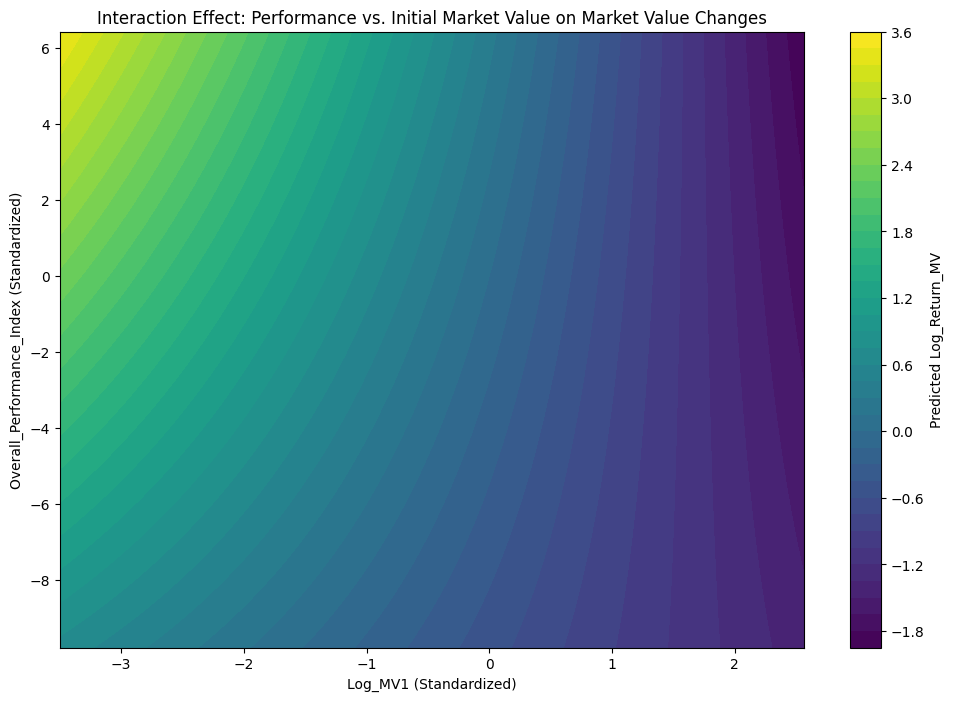

In [26]:
# Define a range for Log_MV1 (initial market value)
log_mv1_vals = np.linspace(data_panel['Log_MV1'].min(), data_panel['Log_MV1'].max(), 100)

# Define a range for Overall_Performance_Index (performance)
performance_vals = np.linspace(data_panel['Overall_Performance_Index'].min(), 
                               data_panel['Overall_Performance_Index'].max(), 100)

# Create a meshgrid for plotting
log_mv1_grid, performance_grid = np.meshgrid(log_mv1_vals, performance_vals)

# Calculate predicted Log_Return_MV using the FE model coefficients
# Assuming other variables are held at their mean values
age_mean = data_panel['Age'].mean()
team_rating_mean = data_panel['Team_Rating'].mean()
min_mean = data_panel['Min'].mean()
fee_mean = data_panel['Latest_Transfer_Fee'].mean()

# Predicted Log_Return_MV
predicted_log_return_mv = (
    fixed_effects_results.params['Log_MV1'] * log_mv1_grid +
    fixed_effects_results.params['Overall_Performance_Index'] * performance_grid +
    fixed_effects_results.params['Age'] * age_mean +
    fixed_effects_results.params['Team_Rating'] * team_rating_mean +
    fixed_effects_results.params['Perf_MV1_Interaction'] * (performance_grid * log_mv1_grid) +
    fixed_effects_results.params['Min'] * min_mean +
    fixed_effects_results.params['Latest_Transfer_Fee'] * fee_mean
)

# Plotting the interaction effect
plt.figure(figsize=(12, 8))
contour = plt.contourf(log_mv1_grid, performance_grid, predicted_log_return_mv, levels=50, cmap='viridis')
plt.colorbar(contour, label='Predicted Log_Return_MV')
plt.xlabel('Log_MV1 (Standardized)')
plt.ylabel('Overall_Performance_Index (Standardized)')
plt.title('Interaction Effect: Performance vs. Initial Market Value on Market Value Changes')
plt.show()

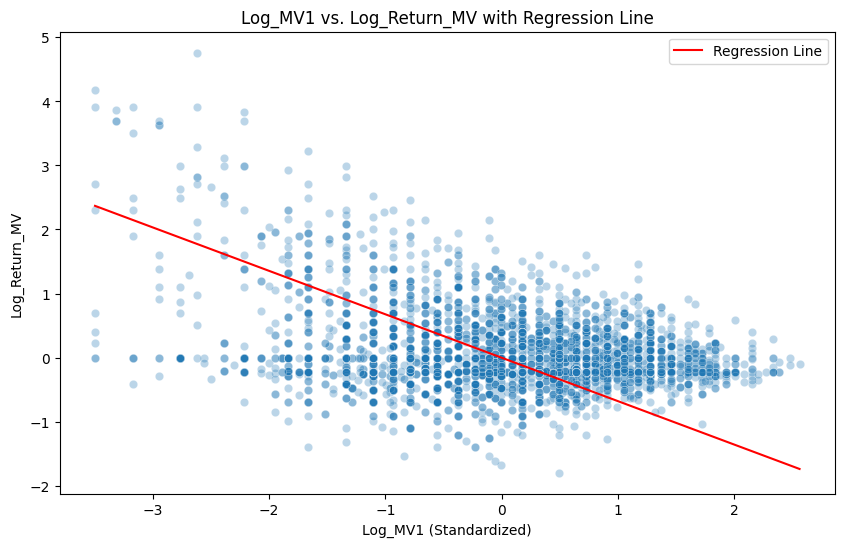

In [27]:
# Scatter plot for Log_MV1 vs. Log_Return_MV
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log_MV1', y='Log_Return_MV', data=data_panel, alpha=0.3)
sns.lineplot(x=log_mv1_vals, y=fixed_effects_results.params['Log_MV1'] * log_mv1_vals + 
                           fixed_effects_results.params['Overall_Performance_Index'] * data_panel['Overall_Performance_Index'].mean() + 
                           fixed_effects_results.params['Age'] * age_mean + 
                           fixed_effects_results.params['Team_Rating'] * team_rating_mean + 
                           fixed_effects_results.params['Perf_MV1_Interaction'] * (data_panel['Overall_Performance_Index'].mean() * log_mv1_vals) + 
                           fixed_effects_results.params['Min'] * min_mean + 
                           fixed_effects_results.params['Latest_Transfer_Fee'] * fee_mean, 
              color='red', label='Regression Line')
plt.title('Log_MV1 vs. Log_Return_MV with Regression Line')
plt.xlabel('Log_MV1 (Standardized)')
plt.ylabel('Log_Return_MV')
plt.legend()
plt.show()